In [38]:
import re
from matplotlib import pyplot as plt
import math
import random

customer_arrivals=[]
interarrivals=[]
analysis=[]
validation=[]

def interarrival_times():
    with open('customer_arrivals.csv','r') as cusfile:
        for line in cusfile:
            x = re.split('\n+',line.rstrip())
            customer_arrivals.append(x)
        for i in range(len(customer_arrivals)-1):
            interarrivals.append(float(customer_arrivals[i+1][0]) - float(customer_arrivals[i][0]))
        ilen=round(len(interarrivals)/4)
        for i in range(ilen*3):
            analysis.append(interarrivals[i])
        for i in interarrivals[(ilen*3):]:
            validation.append(i)

In [39]:
interarrival_times()

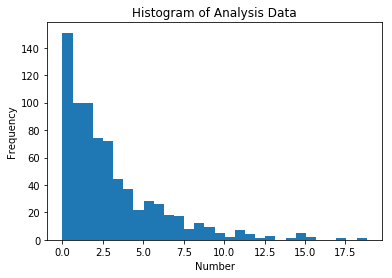

In [40]:
plt.hist(analysis,bins=30)
plt.title('Histogram of Analysis Data')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#As we can see in the histogram, our data seems like fit in Exponential Distribution. So i decided to use Exponential Distribution for modelling this data.
#Let's generate some random numbers from Exponential Distribution with Inverse Transform Method.

In [41]:
#First we need to calculate our lambda parameter with Maximum Likelihood Estimation.
lambdaparameter = len(analysis)/sum(analysis)
print(lambdaparameter)

0.3337115397450444


In [42]:
#Now we need to take the inverse of the CDF of Exponential Distribution (1-e^-lambdaparameter*x)
def inverse(lambdaparameter,x):
    return -math.log(1-x)/lambdaparameter

In [43]:
#And pass a float from uniform distribution between 0,1 to this inverse function.
def exp_random_generate(lambdaparameter):
    x = random.random()
    return inverse(lambdaparameter,x)

In [51]:
exp_random_generate(lambdaparameter)

4.616395855081336

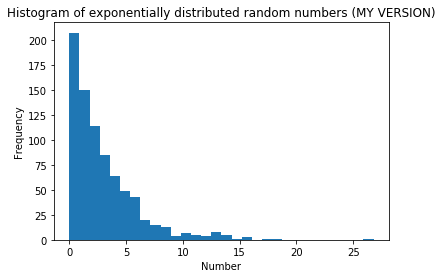

In [60]:
custom_numbers = [exp_random_generate(lambdaparameter) for a in range(800)]
plt.hist(custom_numbers,bins=30)
plt.title('Histogram of exponentially distributed random numbers (MY VERSION)')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

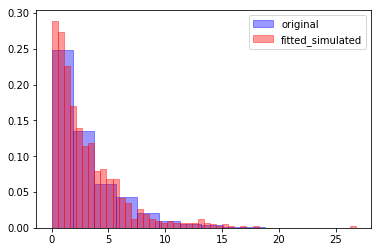

In [62]:
plt.figure()
_=plt.hist(analysis,color='b',alpha=0.4,normed=True,label='original',edgecolor='blue')
plt.hist(custom_numbers,bins=50,alpha=0.4,color='r',density=True,label='fitted_simulated',edgecolor='red')
plt.legend()
plt.show()